In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def load_img_array(img_path):
    """Hàm này load ảnh và resize về kích thước phù hợp với mô hình"""
    img_size = (128, 128)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array    

def predict_single_image(model, img_path):
    """
    Hàm này dự đoán nhãn của mẫu img trên model truyền vào
    In ra xác suất dự đoán trên các nhãn và nhãn có xác suất cao nhất
    """
    img_array = load_img_array(img_path)
    
    predictions = model.predict(img_array)
    probabilities = predictions[0]
    
    class_labels = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
    for label, prob in zip(class_labels, probabilities):
        print(f"{label}: {prob:.2%}")

    predicted_label = class_labels[np.argmax(probabilities)]
    predicted_prob = probabilities[np.argmax(probabilities)]
    print(f"\nPredicted Label: {predicted_label}")
    
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.text(
        0.5, -0.1, 
        f"Predicted: {predicted_label} ({predicted_prob:.2%})", 
        fontsize=11, color="blue", ha='center', transform=plt.gca().transAxes
    )
    plt.show()

In [3]:
model = tf.keras.models.load_model('./Rice_leaf_disease_diagnosis (100%).h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Bacterialblight: 0.00%
Blast: 0.00%
Brownspot: 100.00%
Tungro: 0.00%

Predicted Label: Brownspot


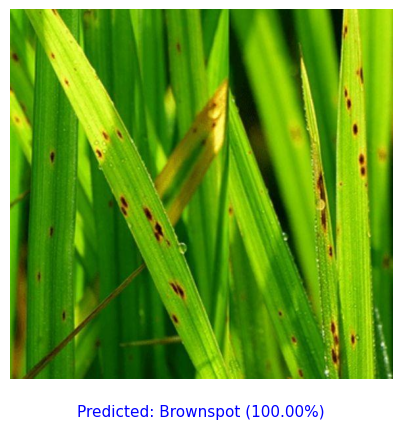

In [4]:
img_path = Path("C:/Users/PC/Downloads/Test rice leaf/bs3.jpg")
predict_single_image(model, img_path)